# **APA ITU LOGISTIC REGRESSION?**



*   Logistic Regression / Regresi Logistik adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

*   Regresi logistik mirip dengan regresi linier, mereka sama-sama memiliki garis regresi, kecuali : **regresi logistik digunakan untuk memprediksi apakah sesuatu bernilai benar atau salah**, ketimbang memprediksi suatu nilai yang kontinu.

*   Regresi logistik pada dasarnya memprediksi kemungkinan terjadinya suatu peristiwa. Jadi, setiap kali nilai probabilitas tidak dapat tepat 0 atau 1 melainkan bervariasi antara rentang 0 hingga 1.

* Regresi Logistik Menggunakan Sigmoid Curve.




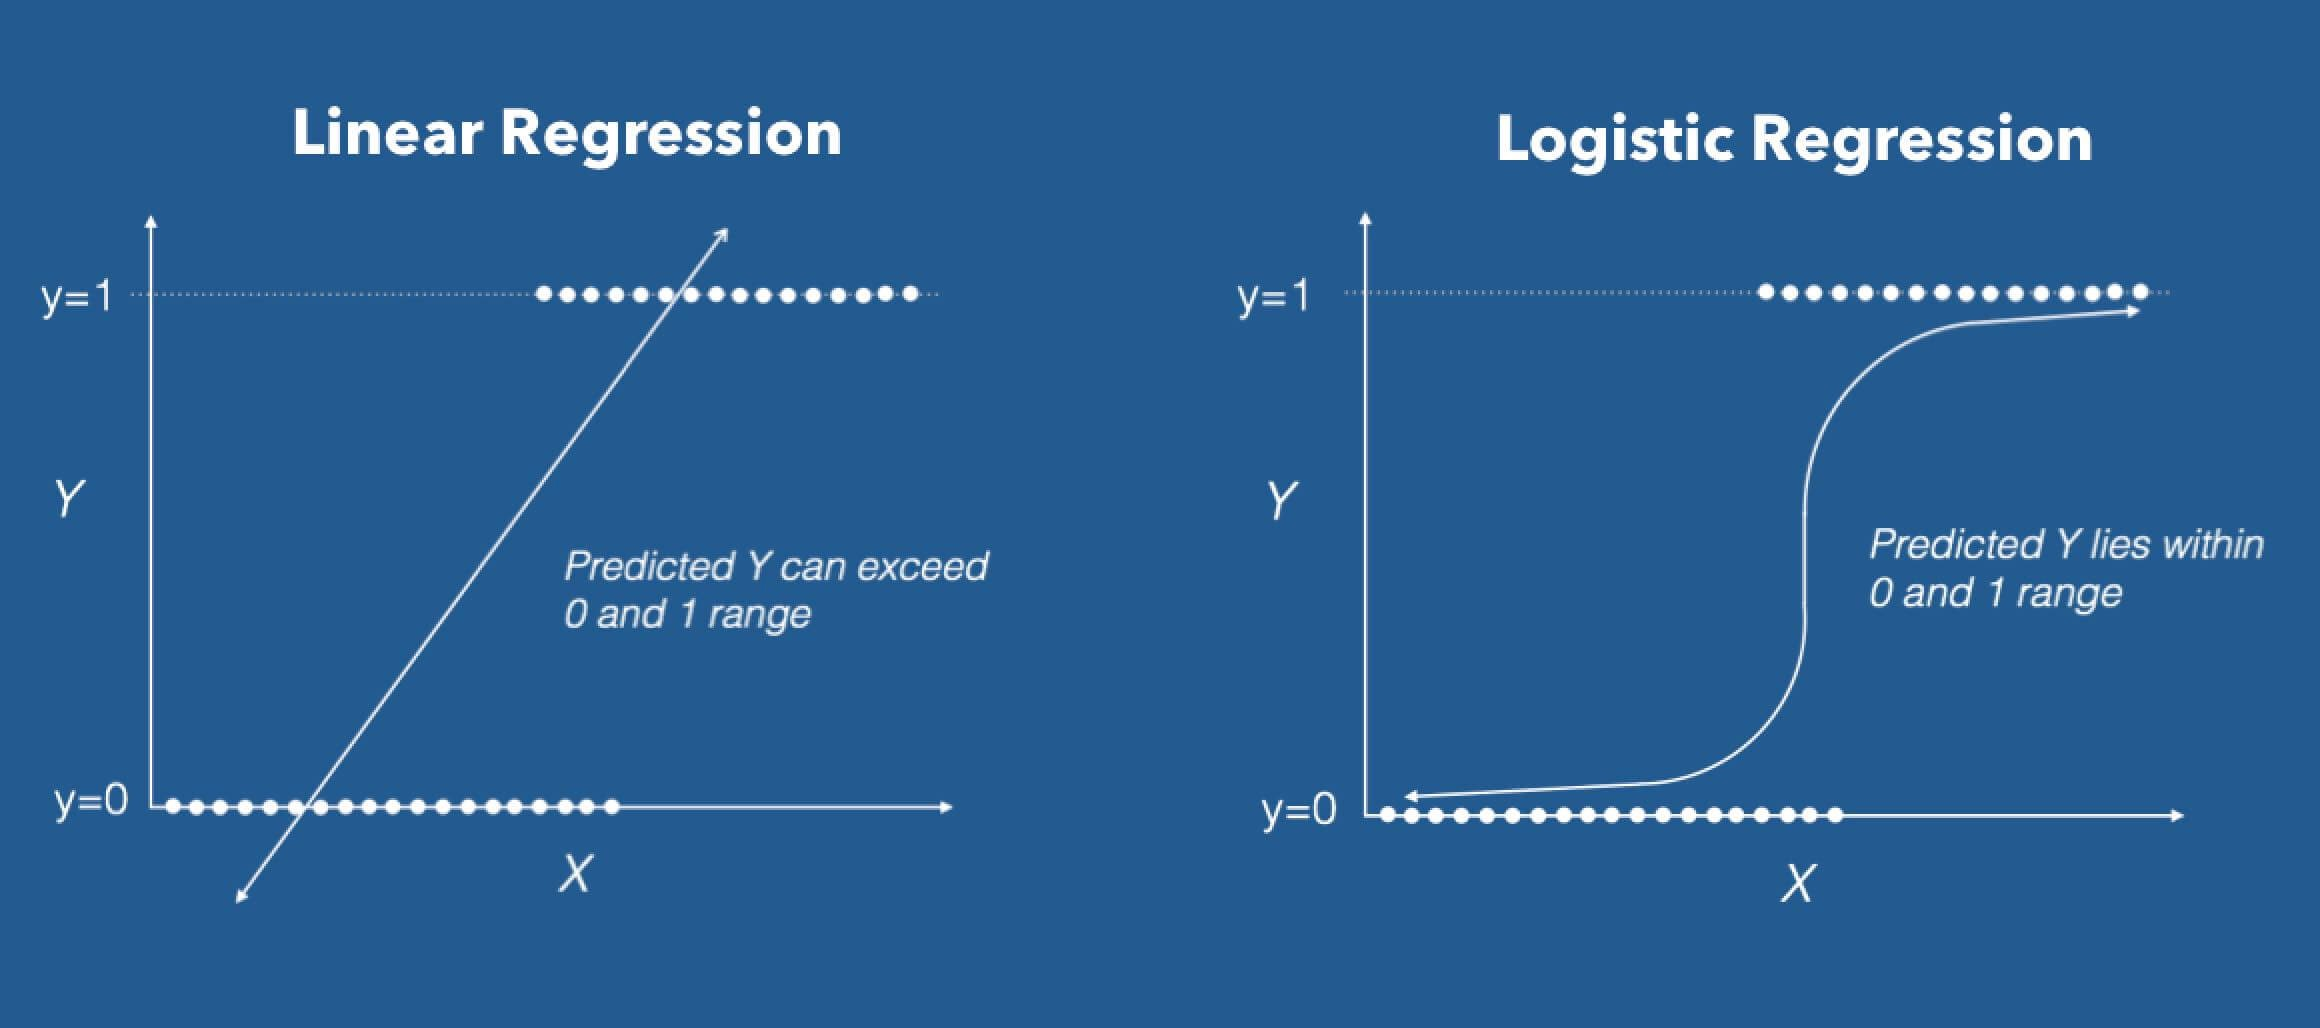

* Perumusan Matematis Logistic Regression

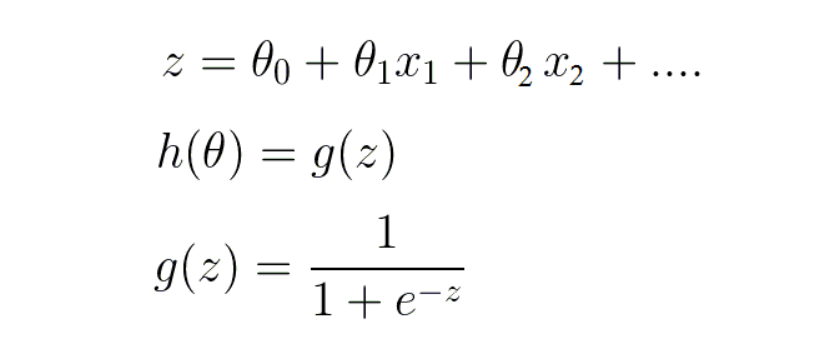

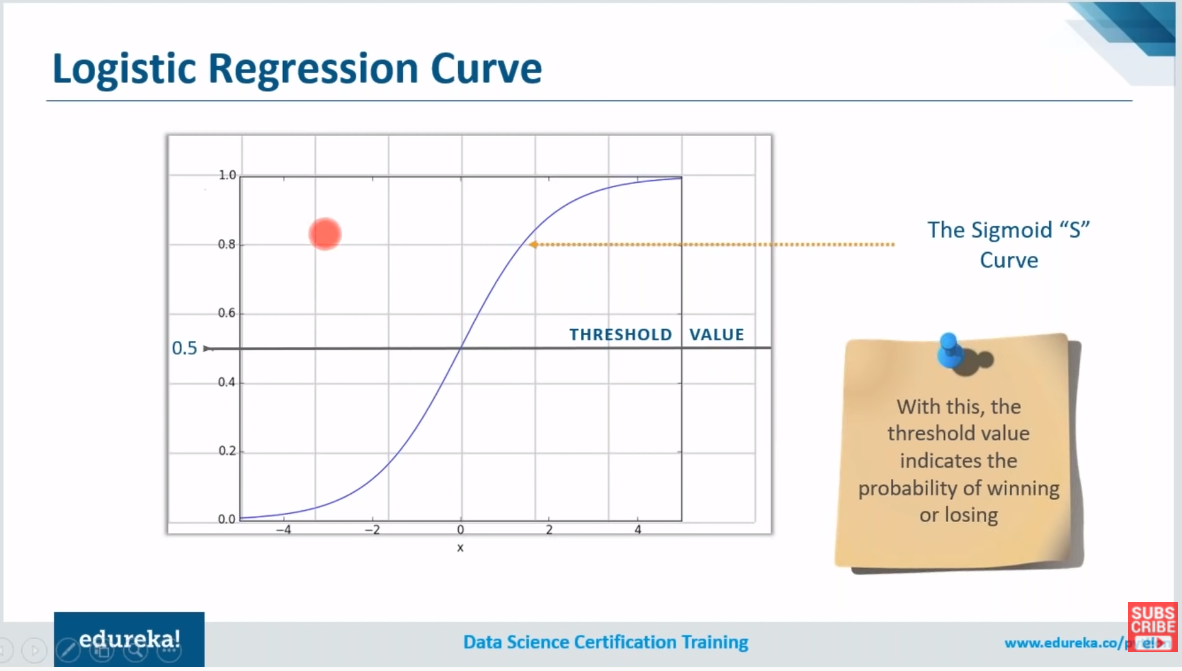

# **KELEBIHAN & KEKURANGAN LOGISTIC REGRESSION**



*   Kelebihan :
    1. Mudah, cepat, dan Simpel untuk suatu Model Klasifikasi
    2. Bisa Digunakan Untuk Multiclass Classification
    3. Mudah Untuk Dipelajari

*   Kekurangan :
    1. data Oulier dan Colinearity sangat mempengaruhi hasil prediksi
    2. Kurang cocok untuk memprediksi data non linear
    3. Diperlukan Feature Selection yang tepat



# **KAPAN PAKAI LOGISTIC REGRESSION?**

*   Regresi Logistik digunakan saat memprediksi variabel kategori (kebanyakan biner / dua class)
*   Regresi Logistik digunakan sebaiknya saat data yang linear 
*   Regresi Logistik menghasilkan PROBABILITAS kemunculan suatu peristiwa sebagai prediksinya.

# **MENGAPA PERLU LOGISTIC REGRESSION?**


*   Logistic regression itu salah satu algoritma klasifikasi yang paling sederhana

* Logistic regression tidak memerlukan asumsi normalitas dari variabel
dependen. Ketika variabel dependen berbentuk kategorikal biner
maka distribusinya adalah binomial.

*   Logistic regression menjadi salah satu dasar untuk mempelajari Neural Network 



# **CONTOH PENGAPLIKASIAN LOGISTIC REGRESSION**


1. Memprediksi sukses atau gagalnya sebuah produk baru
2. Menentukan nasabah memperoleh kredit atau tidak
3. Memprediksi seorang pengunjung akan membeli atau tidak



# **PRAKTEK**

## Import Library

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Read CSV file

In [ ]:
# Membaca Data dan Menampilkannya
data = pd.read_csv('https://raw.githubusercontent.com/roemvaar/data-science-projects/master/data/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Melihat Ukuran Data
data.shape

(891, 12)

## Read CSV file

In [ ]:
# Mencari info type dan kolom kolom yang ada
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Tampilkan Describe dari dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check Null
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Check Data Duplicat
data.loc[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Check Data Imbalance dari label
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Visualisasi Data and EDA 

Visualisasi Label dari Dataset

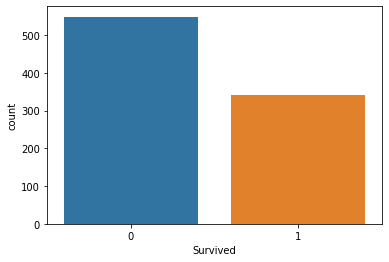

In [ ]:
# Visualisasi Data Label "Survived"
sns.countplot(x='Survived', data=data)

Visualisasi Feature dari Dataset

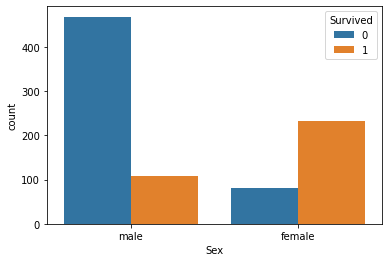

In [ ]:
# Visualisasi Hubungan "Survived" dengan "Sex"
sns.countplot(x='Sex', hue='Survived', data=data)

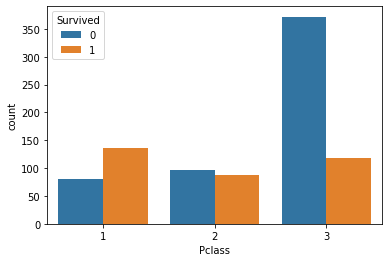

In [ ]:
# Visualisasi Hubungan "Survived" dengan "Pclass"
sns.countplot(x='Pclass', hue='Survived', data=data)

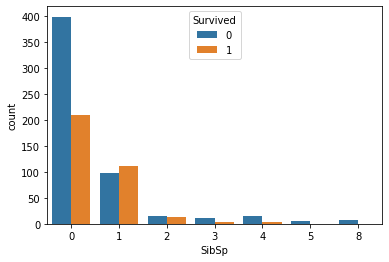

In [ ]:
# Visualisasi Hubungan "Survived" dengan "SibSp"
sns.countplot(x='SibSp', hue='Survived', data=data)

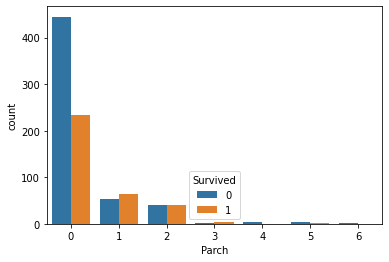

In [ ]:
# Visualisasi Hubungan "Survived" dengan "Parch"
sns.countplot(x='Parch', hue='Survived', data=data)

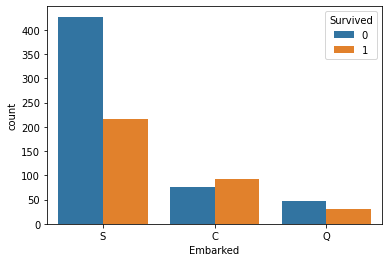

In [ ]:
# Visualisasi Hubungan "Survived" dengan "Embarked"
sns.countplot(x='Embarked', hue='Survived', data=data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

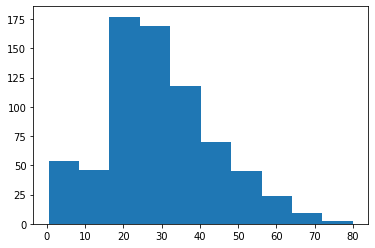

In [ ]:
# Visualisasi Data "Age" dengan "Histogram"
plt.hist(data['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

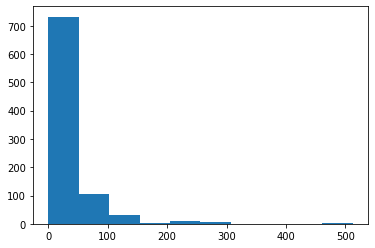

In [ ]:
# Visualisasi Data "Fare" dengan "Pclass"
plt.hist(data['Fare'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1dcad7c450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1dcad84450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dcad8b490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dcad84f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1dcadd4ed0>,
  <matplotlib.lines.Line2D at 0x7f1dcad7ced0>]}

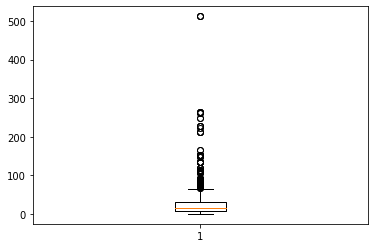

In [ ]:
# Visualisasi Data "Fare" untuk mencari Outlier
plt.boxplot(data['Fare'])

## Pre-Processing Data

Buang Data Outlier

In [ ]:
# Sorting data berdasarkan Fare secara ascending
data.sort_values(["Fare"], ascending=True, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


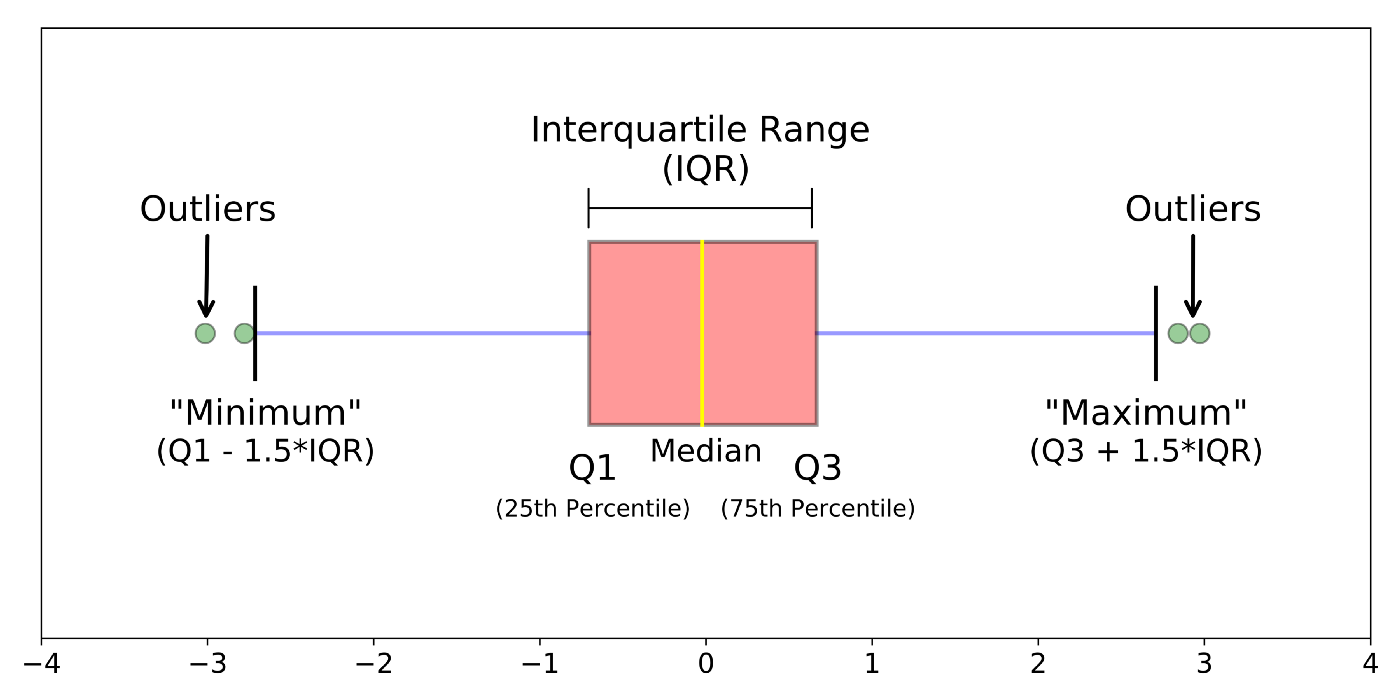

In [ ]:
# Buang data outlier pada Fare dengan menggunakan metode IQR
Q1 = int(data["Fare"]. quantile(0.25))
Q3 = int(data["Fare"]. quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data.loc[(data["Fare"]>Minimum)&(data["Fare"]<Maximum)]

Drop kolom "Cabin" Karena mempunya null value Terbanyak

In [ ]:
# Drop kolom Cabin
data_prep.drop("Cabin", axis=1, inplace=True)
data_prep

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,C
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,S


Drop Baris dengan Nilai null

In [ ]:
# Drop baris yang memiliki nilai null
data_prep.dropna(inplace=True, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check data apakah  masih ada nilai nullnya
data_prep.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

One Hot Encoding Untuk Kolom Kategorikal

In [ ]:
# One Hot Encoding untuk kolom gender/sex
gender = pd.get_dummies(data_prep["Sex"], drop_first=True)
gender.tail(10)

,male
329,0
513,0
92,1
155,1
54,1
97,1
754,0
615,0
336,1
151,0


In [ ]:
# One Hot Encoding untuk kolom embarked
Embarked = pd.get_dummies(data_prep["Embarked"], drop_first=True)
Embarked.head(20)

,Q,S
271,0,1
597,0,1
302,0,1
263,0,1
179,0,1
806,0,1
822,0,1
378,0,0
872,0,1
326,0,1


In [ ]:
# Satukan kembali data
data_prep = pd.concat([data_prep,gender,Embarked], axis=1)
data_prep.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,1,0,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,1,0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,1,0,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,1,0,1
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,1,0,1


Drop data yang tidak terpakai

In [ ]:
# Drop kolom yang tidak ingin dipakai
data_prep.drop(["PassengerId", "Name", "Sex", "Ticket", "Embarked"], axis=1, inplace=True)


In [ ]:
# Lihat 5 data teratas hasil pre-processing
data_prep.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
271,1,3,25.0,0,0,0.0,1,0,1
597,0,3,49.0,0,0,0.0,1,0,1
302,0,3,19.0,0,0,0.0,1,0,1
263,0,1,40.0,0,0,0.0,1,0,1
179,0,3,36.0,0,0,0.0,1,0,1


## Pembuatan Model

Split Data

In [ ]:
# Buat Variable Dependent dan Independent
x_data=data_prep.drop("Survived",axis=1)
y_data=data_prep["Survived"]

In [ ]:
# Split data menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

Data Imblanced (Optional for Learning)

Catatan 
- untuk oversampling sebaiknya dilakukan setelah split data , untuk undersampling dilakukan bisa saat preprocessing data

- hasil over sampling ini tidak masuk ke model

- Berikut link untuk mempeljari SMOTE : https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote#:~:text=SMOTE%20stands%20for%20Synthetic%20Minority,that%20you%20supply%20as%20input.

In [ ]:
# Masukan library SMTOE untuk oversampling
# Check data y_train / kolom "Survived"
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    319
1    173
Name: Survived, dtype: int64

In [ ]:
# Oversampling
smt = SMOTE()
x_ov, y_ov = smt.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Check hasil imbalanced
np.bincount(y_ov)

array([319, 319])

- Berikut Link Untuk mengetahui jenis jenis pengunaan oversampling dan undersampling : https://imbalanced-learn.readthedocs.io/en/stable/api.html# 

Traning dataset dengan Model Logistic Regression

In [ ]:
# Membuat model dan melakukan training
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluasi

In [ ]:
# Cek akurasi pada data test
akurasi = log_reg.score(x_test,y_test)
akurasi = akurasi * 100

print("Akurasi model : ",akurasi)

Akurasi model :  80.48780487804879


In [ ]:
# Cek performa model menggunakan confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, log_reg.predict(x_test))
matrix

array([[72,  6],
       [18, 27]])

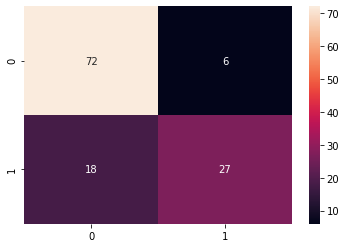

In [ ]:
sns.heatmap(matrix, annot=True)

In [ ]:
# Cek performa model dengan f-1 score
from sklearn.metrics import classification_report
report = classification_report(y_test, log_reg.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        78
           1       0.82      0.60      0.69        45

    accuracy                           0.80       123
   macro avg       0.81      0.76      0.77       123
weighted avg       0.81      0.80      0.80       123



# Prediction 

In [ ]:
# Membuat variabel hasil prediksi dari data testing x_test dan tampilkan hasil prediksi
y_predict=log_reg.predict(x_test)
y_predict=pd.DataFrame(y_predict)
y_predict.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
# tampilkan data asli (y_test) untuk dibandingkan dengan hasil prediksi
y_test= pd.DataFrame(y_test)
y_test.head(20).T

,817,234,814,844,840,788,162,713,519,217,23,686,37,149,808,208,67,812,503,469
Survived,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
# Ambil data sampel untuk dicoba prediksinya sebgai contoh data ke 1 / yang lainnya
predict_test=x_test.iloc[19]
predict_test

Pclass     3.0000
Age        0.7500
SibSp      2.0000
Parch      1.0000
Fare      19.2583
male       0.0000
Q          0.0000
S          0.0000
Name: 469, dtype: float64

In [ ]:
#Membuat Array 2 Dimensi lalu menampilkannya
data_testing = np.array([[3,0.75,2,1,19.2583,0,0,0]])
#prediksi data input
log_reg.predict(data_testing)

array([1])

## Hyperparameter Tuning Using Grid Search

In [ ]:
# Tentukan Parameter Tuning
parm_grid = [
             
            {
                "penalty" : ['l1','l2','elasticnet','none'],
                "C" : np.logspace(-4,4,20),
                "solver": ['lbfgs','newton-cg','liblinear','sag','saga'],
                "max_iter" : [100,1000,2500,5000]

            } 
]

- More about Logistic Regression Parameter : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

More About Hyperparameter

- solver : https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

- l1 and l2 : https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

In [ ]:
# Buat tuning Dengan Grid Search
from sklearn.model_selection import GridSearchCV
clf_grid= GridSearchCV(log_reg,param_grid=parm_grid,cv=10, verbose=True, n_jobs=-1)
best_clf=clf_grid.fit(x_data,y_data)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 6162 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8738 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12338 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:  6.2min finished


In [ ]:
# Check Parameter terbagus
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Test Akurasi
newacc= best_clf.score(x_test,y_test)
newacc=newacc*100
newacc

81.30081300813008

## Pickle

In [ ]:
# Menyimpan model menggunakan pickle
import pickle
with open('Log_regression_save','wb') as model :
    pickle.dump(best_clf,model)

In [ ]:
# load Model pickle
file = open('Log_regression_save','rb')

model_load = pickle.load(file)
# data information

In [ ]:
# prediksi
model_load.predict(data_testing)

array([1])